In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_excel('../00_original/01.data/sms.xlsx')

In [59]:
data = data[['address', 'body', 'date_sent', 'readable_date', 'service_center', 'read', 'type']]

In [60]:
data.describe()

,date_sent,read,type
count,1.444060e+05,144406.000000,144406.000000
mean,1.483646e+12,0.007943,1.000048
std,6.589481e+09,0.088769,0.013158
min,0.000000e+00,0.000000,1.000000
25%,1.481198e+12,0.000000,1.000000
50%,1.483450e+12,0.000000,1.000000
75%,1.486677e+12,0.000000,1.000000
max,1.490270e+12,1.000000,5.000000


In [61]:
for col in data.columns:
    print(col,':')
    print(data[col].value_counts())
    print()


address :
+992935710967    4603
+992935710859    1799
+992935711015    1589
+992935710499    1566
+992935710469    1299
+992935710977    1271
+992935710826    1258
+992935710791    1169
+992935710625    1081
+992935710846    1052
+992935710650    1047
+992935710414    1035
+992935710942    1021
+992935710789    1006
+992935710536     975
+992935710453     974
+992935710529     939
+992935711236     934
+992935710420     913
+992935710458     902
+992935710951     884
+992935710445     881
+992935711238     867
+992935710328     866
+992935710957     855
+992935710874     853
+992935710979     852
+992935710875     824
+992935710627     819
+992935710415     816
                 ... 
+992935710489      35
+992935710554      35
+992935710336      34
+992935710856      34
+992935710946      32
+992935710786      31
+992935710423      26
+992935711071      25
+992935710767      25
+992935710968      24
+992935710836      23
+992935710519      23
+992935710468      21
+992935710862      21


In [62]:
"""
Why does service center vary? (The two cases with "null" are the numbers missing + 992)
What is read?
What is type? Nevermind: the only two cases not equal to one are the numbers missing +992 (see below)

In address:
938303656 should be +992938303656  (all start with '+992' and there is such a number)
"""

'\nWhy does service center vary? (The two cases with "null" are the numbers missing + 992)\nWhat is read?\nWhat is type? Nevermind: the only two cases not equal to one are the numbers missing +992 (see below)\n\nIn address:\n938303656 should be +992938303656  (all start with \'+992\' and there is such a number)\n'

In [63]:
# Check all address fields start with + 992. Four do not
data[~data['address'].str.strip().str.startswith('+992')]

,address,body,date_sent,readable_date,service_center,read,type
46063,Tcell,"Муштарии Мухтарам, Дархости шумо тахти №461640...",1481785352000,12/15/2016 12:02:38,+992939999999,0,1
143801,938303656,Апррр,0,03/22/2017 16:57:26,null,1,4
143802,938303656,Тщлщшолзд,0,03/22/2017 16:57:43,null,1,5
143989,Tcell,"Муштарии мухтарам, аз хисоби Шумо пардохти мох...",1490213385000,03/23/2017 01:11:05,+992939999999,0,1


In [ ]:
"""
Four:

Two we know how to fix:
938303656 should be +992938303656  (all start with '+992' and there is such a number)
These also include the only types not == 1 (one case of type 4, one of type 5)
They are missing service center (the only two cases with Null)
However, they also have what Google recognizes as Tajik text in "body"
(but cannot translate, though maybe app and threshold?)
AND are missing date sent (but do have readable_date)

Two are "Tcell" and have what looks like Tajik text in body
The first one reads 'Subscriber & Query, you №461640 throne.'
The second, 'Dear customer, your cost of the month ...'
(they both start with same characters so 'Subscriber & Query' must mean 'Dear custumer')
"""

In [ ]:
"""
Read date_sent into date time mdyhms(1,1,1970,5,0,0) then compare to readable date
Zero time in Unix time is UTC 00:00:00 1 January 1970 and TJK is UTC + 5 hrs
However, max frequency in date_sent is 15, while it's 8 in readable_date, suggesting it's not the same.
"""

In [64]:
data = data[data['address'].str.strip() != 'Tcell']
data['address'][~data['address'].str.strip().str.startswith('+992')] = '+992938303656'

In [65]:
counts = data[['address', 'body', 'type']].groupby('address').count()
#[['body','type']].groupby('body').count()

In [66]:
counts['body'].describe()

count     307.000000
mean      470.371336
std       382.097914
min         1.000000
25%       254.000000
50%       438.000000
75%       648.500000
max      4603.000000
Name: body, dtype: float64

In [67]:
# дек translates to Dec
data['readable_date'] = data['readable_date'].str.replace('дек.', 'Dec').str.replace('г. ', '')
data['readable_date'] = pd.to_datetime(data['readable_date'], infer_datetime_format=True) #.tz_localize('Asia/Dushanbe')
data['readable_date'].head()

0   2016-10-19 10:11:54
1   2016-10-19 10:12:07
2   2016-10-19 10:12:34
3   2016-10-19 10:14:22
4   2016-10-19 10:14:38
Name: readable_date, dtype: datetime64[ns]

In [68]:
data['date_sent'] = pd.to_datetime(data['date_sent'], unit='ms')
data['date_sent'].describe()

count                  144404
unique                 131218
top       2017-01-15 14:22:50
freq                       15
first     1970-01-01 00:00:00
last      2017-03-23 11:56:32
Name: date_sent, dtype: object

In [69]:
data['date_sent'].sort_values(inplace=False).head()

143801   1970-01-01 00:00:00
143802   1970-01-01 00:00:00
0        2016-10-19 05:11:54
1        2016-10-19 05:12:07
2        2016-10-19 05:12:34
Name: date_sent, dtype: datetime64[ns]

In [70]:
data['readable_date'].describe()

count                  144404
unique                 141475
top       2016-10-19 19:00:52
freq                        8
first     2016-10-19 10:11:54
last      2017-03-23 16:58:24
Name: readable_date, dtype: object

In [71]:
data['readable_date'].sort_values(inplace=False).head()

0   2016-10-19 10:11:54
1   2016-10-19 10:12:07
2   2016-10-19 10:12:34
3   2016-10-19 10:14:22
4   2016-10-19 10:14:38
Name: readable_date, dtype: datetime64[ns]

In [72]:
(data['readable_date']- data['date_sent'] - pd.to_timedelta(5, 'h')).describe()

count                     144404
mean      0 days 06:26:37.461136
std      64 days 04:29:58.208276
min              0 days 00:00:00
25%              0 days 00:00:03
50%              0 days 00:00:07
75%              0 days 00:01:30
max          17247 days 11:57:43
dtype: object

In [212]:
"""
The two 1970-01-01 00:00:00 are errors. These had 0 as values as that is UTC 0
Otherwise, dateSent is GMT time (five hours difference)...
but there are some slight differences! Do they increase at later dates
I'll keep it to see if it makes sense later
"""

"\nThe two 1970-01-01 00:00:00 are errors. These had 0 as values as that is UTC 0\nOtherwise, dateSent is GMT time (five hours difference)...\nbut there are some slight differences! Do they increase at later dates\nI'll keep it to see if it makes sense later\n"

In [73]:
data['date_sent'] = data['date_sent'] + pd.to_timedelta(5, 'h') # date_sent into TJK time

In [74]:
bodyNoId = pd.Series(data['body'].str.strip().str.replace('\d+', '').str.lower().str.replace('id', '').str.replace('  ', ' '))
bodyNoId = bodyNoId.str.replace('.', '').str.replace('  ', ' ').str.replace('_ ', '').str.replace('l ', '')
bodyNoId.value_counts()

power failure is running | monitoring power ok                     42907
power failure detected                                             41792
power back detected                                                40297
power failure is running | monitoring power failure                17531
test sms from power failure monitor:power failure is running         454
test sms from power failure monitor:power failure detected           420
test sms from power failure monitor:power back detected              395
power failure                                                        229
power back                                                           229
power back detected                                                  138
муштари занги шуморо интизор аст абонент просит вас перезвонить        2
test sms from power failure monitor:power back detec                   2
test sms from power failure monitor:power failure detected il          1
test sms from power failure monitor:power failure i

In [75]:
data['id'] = pd.Series(data['body'].str.extract('(\d{4})', expand=False), dtype='int')

In [76]:
data['id'].describe()

count     144395
unique       301
top         1067
freq        4603
Name: id, dtype: object

In [77]:
data['id'].isnull().sum()

9

In [78]:
pd.set_option('display.max_colwidth', -1)
print(data[data['id'].isnull() == True])
pd.set_option('display.max_colwidth', 50)

              address  \
450     +992935711044   
3165    +992935710834   
3167    +992935710834   
35018   +992938303656   
49961   +992935821825   
103643  +992935710316   
143801  +992938303656   
143802  +992938303656   
143805  +992938303656   

                                                                    body  \
450     Test SMS from Power Failure Monitor:Power Failure  is running ID   
3165    Power Back detected.                                               
3167    Power Back detected.                                               
35018   Test                                                               
49961   Муштари занги Шуморо интизор аст. Абонент просит Вас перезвонить   
103643  Test SMS from Power Failure Monitor:Power Failure detected. Il     
143801  Апррр                                                              
143802  Тщлщшолзд                                                          
143805  Муштари занги Шуморо интизор аст. Абонент просит Вас пере

In [ ]:
# Question is: can we add id from address for these 9 cases?
"""
Муштари занги Шуморо интизор аст. Абонент просит Вас перезвонить = 
Client is waiting for your call. Prosit the subscriber Vas perezvonitь

The other two with Tajik writitng are the ones where we corrected address
Апррр = Aprrr (April?)
Тщлщшолзд   = ???

One has 'Test' and that alone, with no 'Monitor'. We checked and it's the only one with 'Test' only
"""

In [79]:
print(data['address'][data['id'].notnull()].drop_duplicates().shape, data['id'][data['id'].notnull()].drop_duplicates().shape)

(305,) (301,)


In [80]:
addressToId = {}
for address in data['address'][data['id'].notnull()].drop_duplicates():
    addressToId[address] = set(data['id'][(data['address'] == address) & (data['id'].notnull())])

In [81]:
idToAddress = {}
for id in data['id'][data['id'].notnull()].drop_duplicates():
    idToAddress[id] = set(data['address'][data['id'] == id])

In [82]:
addressToNullId = {}
for address in data['address'][data['id'].isnull()].drop_duplicates():
    addressToNullId[address] = set(data['id'][data['address'] == address])
addressToNullId

{'+992935710316': {'1040', nan, '1056'},
 '+992935710834': {nan, '1253'},
 '+992935711044': {nan, '1221'},
 '+992935821825': {nan},
 '+992938303656': {nan}}

In [83]:
for multAddress in addressToId.keys():
    if len(addressToId[multAddress]) > 1:
        print(multAddress, ':', addressToId[multAddress])

+992935710433 : {'1269', '1069'}
+992935710986 : {'1240', '1140'}
+992935710316 : {'1040', '1056'}


In [84]:
for multId in idToAddress.keys():
    if len(idToAddress[multId]) > 1:
        print(multId, ':', idToAddress[multId])

1230 : {'+992900004352', '+992935710527'}
1135 : {'+992900004351', '+992935710870'}
1123 : {'+992900004354', '+992935710336'}
1269 : {'+992935711038', '+992935710433'}
1056 : {'+992935710316', '+992935710463'}
1140 : {'+992935710597', '+992935710986'}
1095 : {'+992935710787', '+992900004395'}


In [85]:
for corrections in ['+992935711044', '+992935710834', '+992935710316']:
    print(corrections, ':', addressToId[corrections])

+992935711044 : {'1221'}
+992935710834 : {'1253'}
+992935710316 : {'1040', '1056'}


In [ ]:
"""
Why do we have multiple addresses to ID and viceversa?
We would like to use address to impute ID (ID is the field to merge with Boxes data set),
so let's wait until we understand
"""

In [86]:
boxes = pd.read_csv('../00_original/01.data/Boxes.csv')
boxes.rename(columns={'BoxID' : 'id'}, inplace = True)
print(boxes.shape)

(296, 14)


In [ ]:
"""
There are 296 boxes here, but 301 in the sms data?
"""

In [87]:
data['id'] = data['id'].astype('float')
boxes['id'] = boxes['id'].astype('float')
boxes['dateCollectionStartDays'] = pd.to_datetime(boxes['DateCollectionStart'], infer_datetime_format=True).dt.date
#boxes.drop('DateCollectionStart', axis=1, inplace=True)
data = data.merge(boxes, how='outer', on='id', indicator=True)

In [88]:
data['_merge'].value_counts()

both          143642
left_only        762
right_only         0
Name: _merge, dtype: int64

In [89]:
data['id'][data._merge == 'left_only'].value_counts()

1175.0    326
1190.0    212
1164.0    169
1157.0     45
9929.0      1
Name: id, dtype: int64

In [ ]:
"""
The last (9929) seems to be an error.
The other four... what happened?
"""

In [108]:
"""
Temporarily, settle for those in both
"""

In [90]:
data = data[data['_merge'] == 'both']

In [91]:
date = data['readable_date'].dt.date
date = (date - date.min())  / np.timedelta64(1,'D')
date.describe()

count    143642.000000
mean         78.730476
std          41.635258
min           0.000000
25%          50.000000
50%          76.000000
75%         114.000000
max         155.000000
Name: readable_date, dtype: float64

(array([ 0.00699966,  0.00966219,  0.01172215,  0.00680347,  0.00341925,
         0.00299185,  0.00268355,  0.00390972,  0.00372054,  0.00360143,
         0.01033483,  0.00763026,  0.01369103,  0.00258546,  0.00208799,
         0.00220009,  0.00271859,  0.00196187,  0.00233322,  0.00243832,
         0.00275362,  0.00271859,  0.002102  ,  0.00471549,  0.00389571,
         0.00323007,  0.0034683 ,  0.0040989 ,  0.00418999,  0.00444923,
         0.00424604,  0.00502378,  0.01247187,  0.00158351,  0.00198989,
         0.00667735,  0.00613083,  0.00690157,  0.00684551,  0.00686653,
         0.00666334,  0.00372054,  0.        ,  0.00355238,  0.00742707,
         0.00701367,  0.00776339,  0.00011211,  0.0043091 ,  0.00745509,
         0.00901057,  0.01027878,  0.01235275,  0.01001953,  0.01048197,
         0.00994246,  0.00924179,  0.00865323,  0.0086182 ,  0.01182725,
         0.00856915,  0.00936091,  0.00833093,  0.00896853,  0.00866024,
         0.00901057,  0.01009661,  0.01032082,  0.0

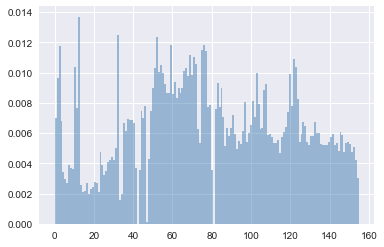

In [92]:
plt.hist(date,
         bins=156,
         normed=True,
         alpha=0.5,
         histtype='stepfilled',
         color='steelblue',
         edgecolor='none')

In [93]:
dataMonitor = data[data['body'].str.lower().str.contains('monitoring')].copy()
dataMonitor.shape[0] / data.shape[0]

0.4168975647791036

In [94]:
dataMonitor['readableDateDays'] = dataMonitor['readable_date'].dt.date
dataMonitor['displaceDateDays'] = (dataMonitor['readableDateDays'] - dataMonitor['readableDateDays'].min()
                               ) / np.timedelta64(1,'D')
dataMonitor['displaceDateDays'].describe()

count    59884.000000
mean        84.844817
std         43.876032
min          0.000000
25%         54.000000
50%         89.000000
75%        122.000000
max        155.000000
Name: displaceDateDays, dtype: float64

(array([ 0.01230249,  0.02189911,  0.01132771,  0.00709242,  0.00781511,
         0.00675629,  0.00584873,  0.0047731 ,  0.00569747,  0.00546217,
         0.00438655,  0.0022689 ,  0.00248739,  0.00278991,  0.0025042 ,
         0.00233613,  0.00218487,  0.00196638,  0.00186554,  0.00191596,
         0.00210084,  0.00208403,  0.0020168 ,  0.00179832,  0.00240336,
         0.0025042 ,  0.00287394,  0.00322688,  0.00337814,  0.0035126 ,
         0.00373108,  0.00406722,  0.00398318,  0.00131092,  0.0014958 ,
         0.00468907,  0.00435293,  0.00499159,  0.0052773 ,  0.00526049,
         0.00524369,  0.00374789,  0.        ,  0.00299159,  0.00573108,
         0.00593276,  0.00608402,  0.00026891,  0.00393276,  0.00635293,
         0.00643696,  0.00685713,  0.00721007,  0.00732772,  0.00715965,
         0.00714284,  0.00712604,  0.00709242,  0.00705881,  0.00700839,
         0.00694116,  0.00689074,  0.00702519,  0.00697477,  0.00694116,
         0.00747898,  0.00774788,  0.00806721,  0.0

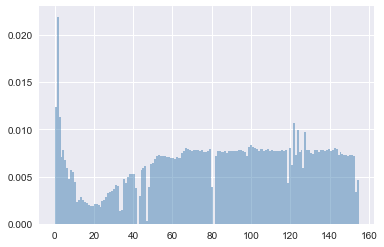

In [95]:
plt.hist(dataMonitor['displaceDateDays'],
         bins=156,
         normed=True,
         alpha=0.5,
         histtype='stepfilled',
         color='steelblue',
         edgecolor='none')

In [ ]:
"""
That's very promising: the monitoring messages grow for a while as more boxes kick in
then seem to stabilize at some point, as all boxes are in.
Of course, there are questions regarding the initial spike, a what still looks like 
some variation over time, even if relatively small (except for some drops and about three spikes)
"""

In [96]:
print(dataMonitor[dataMonitor['dateCollectionStartDays'] > dataMonitor['readableDateDays']].shape)

(6415, 25)


In [ ]:
"""There are 6,415 observations with readings from before the collection start day"""

In [97]:
dataMonitor = dataMonitor[dataMonitor['dateCollectionStartDays'] <= dataMonitor['readableDateDays']]

(array([  3.83891896e-05,   3.83891896e-05,   1.91945948e-04,
          4.03086491e-04,   5.37448654e-04,   6.71810818e-04,
          6.91005413e-04,   7.86978387e-04,   4.79864870e-04,
          6.33421628e-04,   9.02145956e-04,   1.03650812e-03,
          1.30523245e-03,   1.43959461e-03,   1.59315137e-03,
          1.59315137e-03,   1.66992975e-03,   2.03462705e-03,
          2.16898921e-03,   2.14979462e-03,   1.97704326e-03,
          2.62965949e-03,   2.74482706e-03,   2.89838382e-03,
          3.22469193e-03,   3.39744328e-03,   3.60858382e-03,
          3.89650274e-03,   4.22281086e-03,   4.12683788e-03,
          1.42040002e-03,   1.55476218e-03,   5.14415141e-03,
          4.76025951e-03,   5.48965411e-03,   5.71998925e-03,
          5.70079466e-03,   5.75837844e-03,   0.00000000e+00,
          4.14603248e-03,   0.00000000e+00,   3.28227571e-03,
          6.31502169e-03,   6.62213521e-03,   6.79488656e-03,
          3.07113517e-04,   4.39556221e-03,   7.17877846e-03,
        

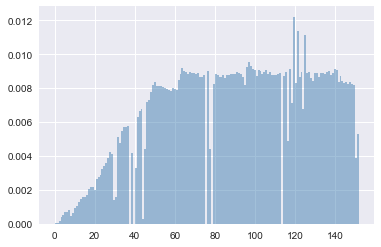

In [98]:
dataMonitor['displaceDateDays'] = (dataMonitor['readableDateDays'] - dataMonitor['readableDateDays'].min()
                               ) / np.timedelta64(1,'D')
plt.hist(dataMonitor['displaceDateDays'],
         bins=156,
         normed=True,
         alpha=0.5,
         histtype='stepfilled',
         color='steelblue',
         edgecolor='none')

In [99]:
dataMonitor.set_index(['id', 'readableDateDays'], inplace=True)

In [100]:
pd.set_option('display.max_colwidth', -1)
print(dataMonitor[['body', 'readable_date']].head())
pd.set_option('display.max_colwidth', 50)

                                                                                    body  \
id     readableDateDays                                                                    
1301.0 2016-11-09        Power Failure  is running id 1301 | Monitoring... Power OK        
       2016-11-10        Power Failure  is running id 1301 | Monitoring... Power Failure   
       2016-11-11        Power Failure  is running id 1301 | Monitoring... Power Failure   
       2016-11-11        Power Failure  is running id 1301 | Monitoring... Power OK        
       2016-11-12        Power Failure  is running id 1301 | Monitoring... Power OK        

                              readable_date  
id     readableDateDays                      
1301.0 2016-11-09       2016-11-09 21:24:59  
       2016-11-10       2016-11-10 09:06:53  
       2016-11-11       2016-11-11 09:07:10  
       2016-11-11       2016-11-11 21:07:18  
       2016-11-12       2016-11-12 21:07:30  


In [101]:
data[['body', 'readable_date', 'dateCollectionStartDays']][(data['id'] == 1301)].sort_index()

,body,readable_date,dateCollectionStartDays
0,Power Failure is running id 1301 | Monitoring...,2016-10-19 10:11:54,2016-11-08
1,Power Failure is running id 1301 | Monitoring...,2016-10-19 11:11:57,2016-11-08
2,Power Failure is running id 1301 | Monitoring...,2016-10-19 12:11:57,2016-11-08
3,Power Failure is running id 1301 | Monitoring...,2016-10-19 13:11:58,2016-11-08
4,Power Failure is running id 1301 | Monitoring...,2016-10-19 14:12:28,2016-11-08
5,Power Failure is running id 1301 | Monitoring...,2016-10-19 15:12:30,2016-11-08
6,Power Failure is running id 1301 | Monitoring...,2016-10-19 16:12:31,2016-11-08
7,Power Failure is running id 1301 | Monitoring...,2016-10-19 17:21:07,2016-11-08
8,Power Failure is running id 1301 | Monitoring...,2016-10-19 18:41:05,2016-11-08
9,Power Failure is running id 1301 | Monitoring...,2016-10-19 19:41:07,2016-11-08


In [108]:
"""
//Identify purpose of message
100   g pback = regexm(body, "Power Back detected")
101   g pfail = regexm(body, "Power Failure detected")
102   g pfail_mon = regexm(body, "Monitoring... Power Failure")
103   g pon_mon = regexm(body, "Monitoring... Power OK")
104   g test = regexm(body, "Test SMS")
105   replace test =1 if message1=="Test"
106   g alive = 0
107   replace alive = 1 if pfail_mon == 1
108   replace alive = 1 if pon_mon == 1
109 
110   g pback2 = regexm(body, "Power Back.")
111   replace pback = 1 if pback2==1 & test==0
112 
113   g pfail2 = regexm(body, "Power Failure. ID 1043")
114   g pfail3 = regexm(body, "Power Failure. ID 1281")
115   replace pfail = 1 if pfail2 == 1
116   replace pfail = 1 if pfail3 == 1
"""

'\n//Identify purpose of message\n100   g pback = regexm(body, "Power Back detected")\n101   g pfail = regexm(body, "Power Failure detected")\n102   g pfail_mon = regexm(body, "Monitoring... Power Failure")\n103   g pon_mon = regexm(body, "Monitoring... Power OK")\n104   g test = regexm(body, "Test SMS")\n105   replace test =1 if message1=="Test"\n106   g alive = 0\n107   replace alive = 1 if pfail_mon == 1\n108   replace alive = 1 if pon_mon == 1\n109 \n110   g pback2 = regexm(body, "Power Back.")\n111   replace pback = 1 if pback2==1 & test==0\n112 \n113   g pfail2 = regexm(body, "Power Failure. ID 1043")\n114   g pfail3 = regexm(body, "Power Failure. ID 1281")\n115   replace pfail = 1 if pfail2 == 1\n116   replace pfail = 1 if pfail3 == 1\n'

In [102]:
test = dataMonitor.copy()
test.reset_index(inplace=True)
#test.set_index(['id', 'readable_date'], inplace=True)

In [103]:
boxCount = test[['id', 'address']].groupby('id').count()
boxCount.describe()

,address
count,275.000000
mean,194.432727
std,93.847358
min,1.000000
25%,133.500000
50%,213.000000
75%,246.500000
max,505.000000


In [104]:
boxDateCount = test[['id', 'readableDateDays', 'address']].groupby(['id', 'readableDateDays']).count()
boxDateCount.describe()

,address
count,25628.000000
mean,2.086351
std,0.669241
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,6.000000


In [105]:
boxDateCount[boxDateCount['address'] > 2].unstack('readableDateDays').shape

(228, 134)

In [106]:
daySpan = pd.DataFrame(np.array(dataMonitor.reset_index()['readableDateDays'].min(), dtype=np.datetime64
                  ) + np.arange(int((dataMonitor.reset_index()['readableDateDays'].max() - 
                                 dataMonitor.reset_index()['readableDateDays'].min()) / np.timedelta64(1,'D') + 1)))


In [107]:
print(dataMonitor.reset_index()['readableDateDays'].min(), dataMonitor.reset_index()['readableDateDays'].max())
print(daySpan.head(), daySpan.tail())

2016-10-22 00:00:00 2017-03-23 00:00:00
           0
0 2016-10-22
1 2016-10-23
2 2016-10-24
3 2016-10-25
4 2016-10-26              0
148 2017-03-19
149 2017-03-20
150 2017-03-21
151 2017-03-22
152 2017-03-23


In [108]:
forMerge = pd.MultiIndex.from_product([boxDateCount.reset_index()['id'].drop_duplicates(), daySpan], names=['id', 'readableDateDays'])
dataForMerge = pd.DataFrame([0] * forMerge.shape[0], columns = ['address_fill'], index=forMerge).reset_index()
dataForMerge.head()

,id,readableDateDays,address_fill
0,1001.0,2016-10-22,0
1,1001.0,2016-10-23,0
2,1001.0,2016-10-24,0
3,1001.0,2016-10-25,0
4,1001.0,2016-10-26,0


In [109]:
boxDateCount = dataForMerge.merge(boxDateCount.reset_index(), how='outer')

In [110]:
boxDateCount['address'] = boxDateCount['address'].where(boxDateCount['address'].notnull(), 0)
boxDateCount.drop('address_fill', inplace=True, axis =1)

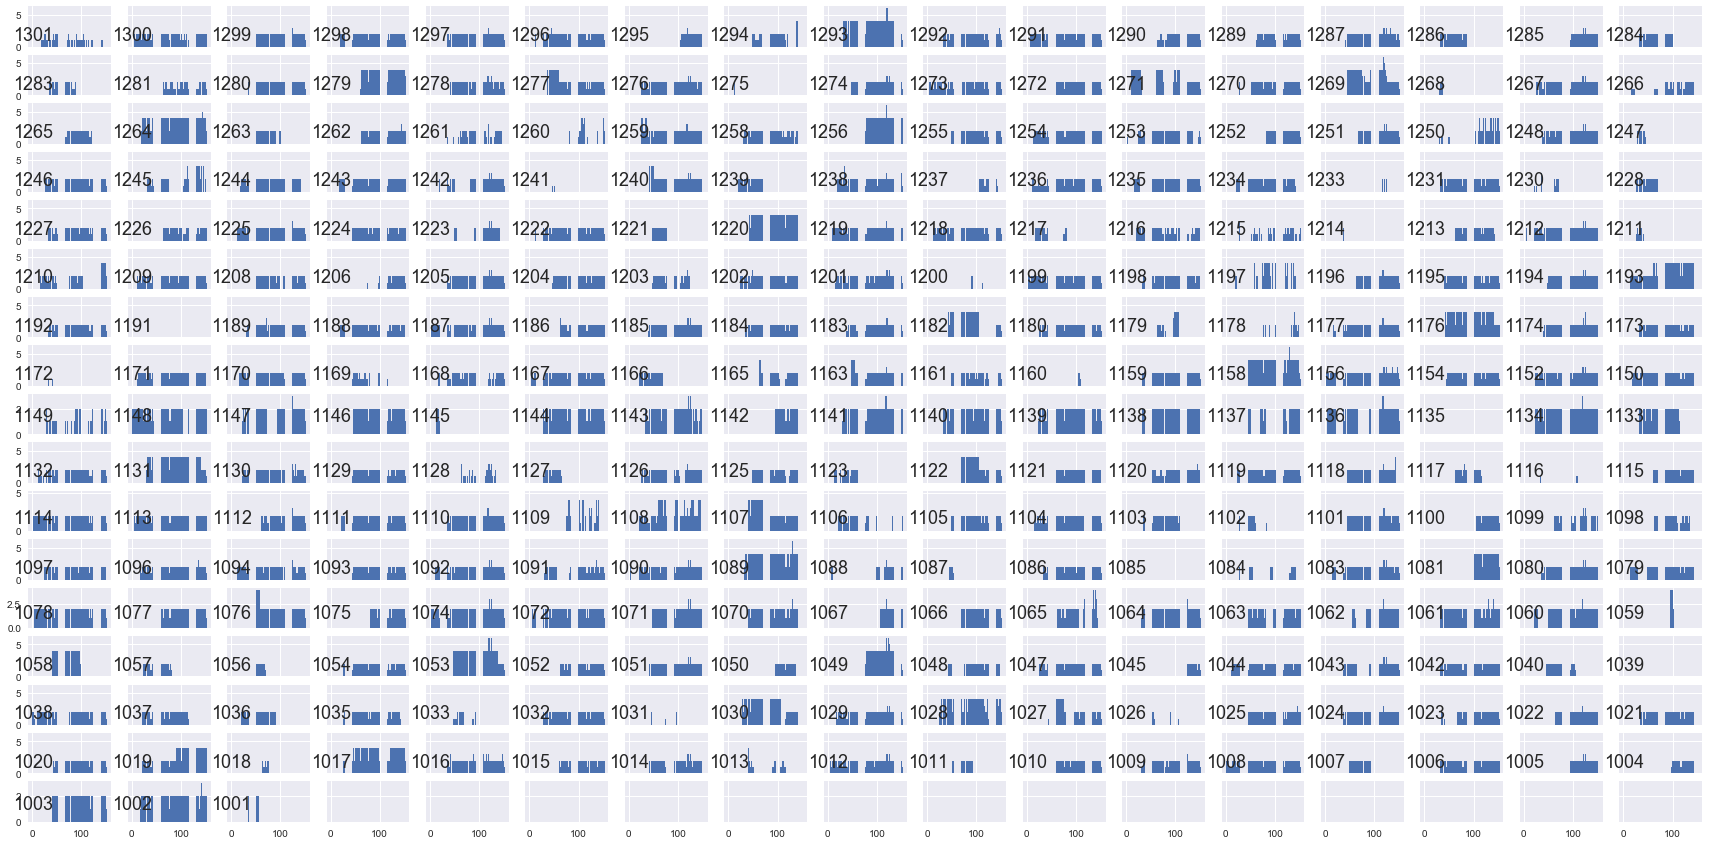

In [69]:
fig, ax = plt.subplots(17, 17, figsize=(30, 15), sharex='col', sharey='row')
boxId = list(boxDateCount['id'].drop_duplicates())

for row in range(17):
    for column in range(17):
        if row * 17 + column < 275:
            thisBox = boxId.pop()
            thisHist = boxDateCount[boxDateCount['id'] == thisBox]
            ax[row, column].bar(range(thisHist['address'].shape[0]), thisHist['address'])
            ax[row, column].text(1, 1, str(int(thisBox)), fontsize=18, ha='center')
fig.savefig('fooNumber.png', bbox_inches='tight')

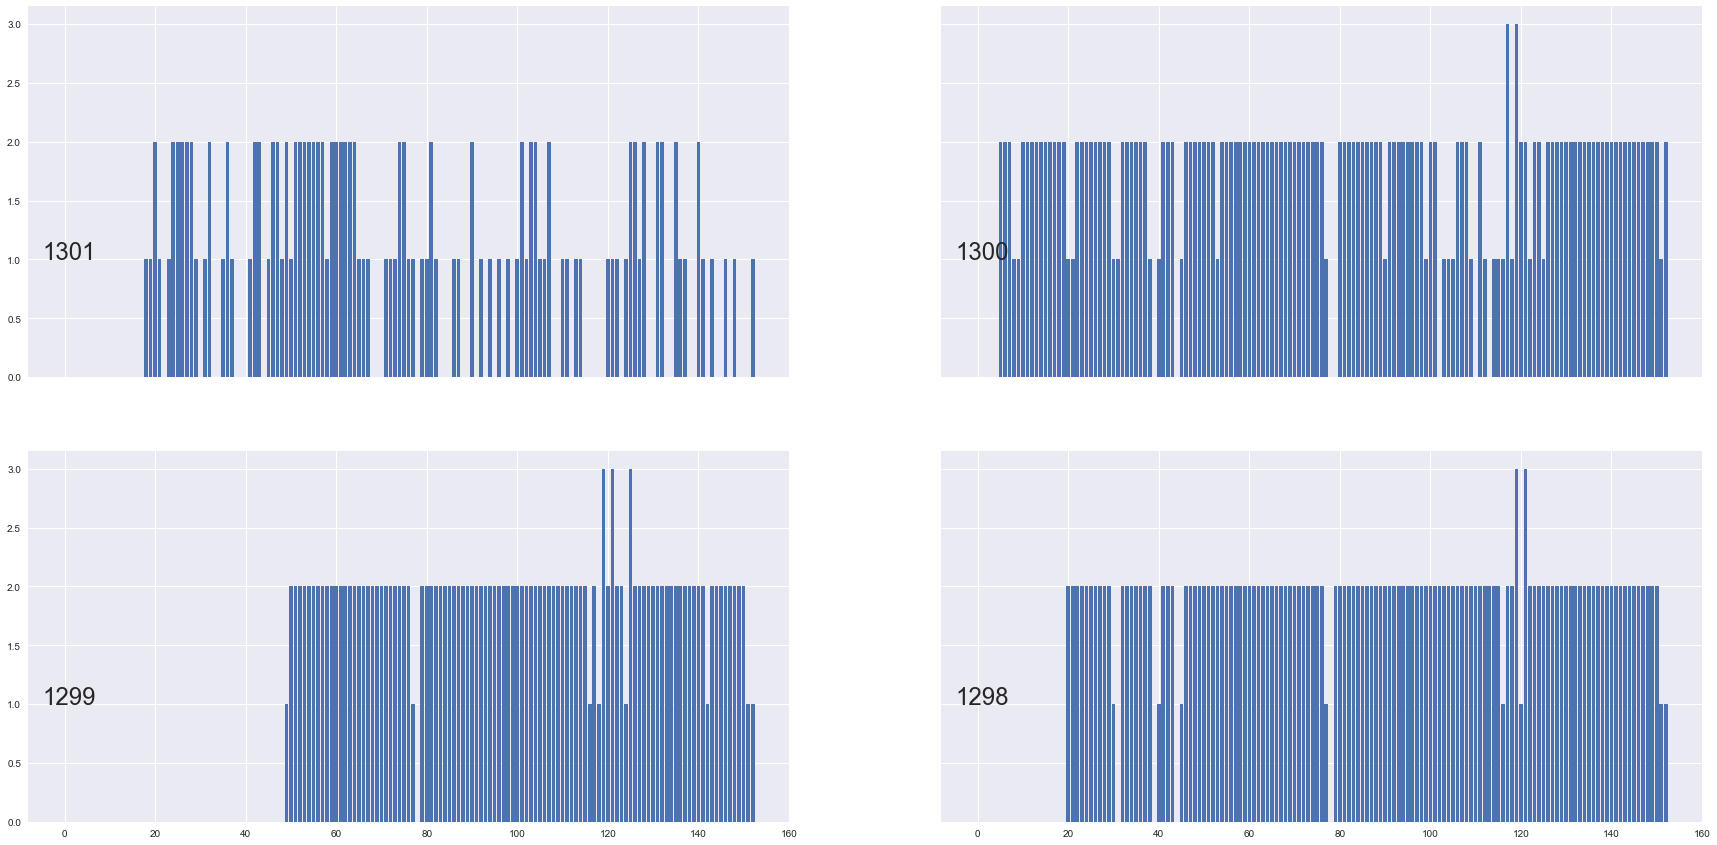

In [70]:
fig2, ax2 = plt.subplots(2, 2, figsize=(30, 15), sharex='col', sharey='row')
forGraph = boxDateCount.reset_index()
boxId = list(forGraph['id'].drop_duplicates())

for row in range(2):
    for column in range(2):
        thisBox = boxId.pop()
        thisHist = forGraph[forGraph['id'] == thisBox]
        ax2[row, column].bar(range(thisHist['address'].shape[0]), thisHist['address'])
        ax2[row, column].text(1, 1, str(int(thisBox)), fontsize=24, ha='center')

fig2.savefig('foo2.png', bbox_inches='tight')

In [111]:
data.to_pickle('data.pandas')
dataMonitor.to_pickle('dataMonitor.pandas')